# Exploratory Data Analysis

## Imports

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


## Dataset da Repartição da Produção 

### Importação e Visualização

In [16]:
# Caminho para o ficheiro
file_path = "data/raw/Repartição da Produção_200100101_20250424.csv"

# Ler o CSV ignorando a primeira linha
df = pd.read_csv(file_path, encoding='utf-8', sep=';', skiprows=2)

# Mostrar as primeiras linhas
print(df.head())


        Data e Hora  Hídrica  Eólica  Solar  Biomassa  Ondas  \
0  01/01/2010 00:00   3209.3  2202.2    0.0     211.2    0.0   
1  01/01/2010 00:15   3212.6  2163.9    0.0     208.6    0.0   
2  01/01/2010 00:30   3139.7  2219.6    0.0     204.4    0.0   
3  01/01/2010 00:45   3101.9  2206.1    0.0     205.7    0.0   
4  01/01/2010 01:00   3262.5  2160.2    0.0     205.6    0.0   

   Gás Natural - Ciclo Combinado  Gás natural - Cogeração  Carvão  \
0                          569.6                    371.9   218.8   
1                          606.4                    351.6   218.0   
2                          596.8                    348.7   220.8   
3                          573.6                    349.0   267.6   
4                          558.0                    348.9   348.0   

   Outra Térmica  Importação  Exportação  Bombagem  Injeção de Baterias  \
0           75.1         0.0      1185.0     115.3                  0.0   
1           40.2         0.0      1240.2      23.1

### Estatísticas Descritivas

In [14]:
# Estatísticas descritivas
print("\n Estatísticas descritivas:")
print(df.describe())


 Estatísticas descritivas:
            Unidades: MW  Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4  \
count             536926    536925.0    536925.0    536925.0    536925.0   
unique            536866     76270.0     62404.0     21213.0      4187.0   
top     31/10/2010 01:30        15.6       287.6         0.0       310.4   
freq                   2       139.0        47.0    213341.0       627.0   

        Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  \
count     536925.0    536925.0    536925.0    536925.0    536925.0   
unique         3.0     14126.0     11168.0      8551.0      6141.0   
top            0.0         0.0       389.9         0.0        29.4   
freq      504158.0    113926.0       189.0    182457.0      2748.0   

        Unnamed: 10  Unnamed: 11  Unnamed: 12  Unnamed: 13  Unnamed: 14  \
count      536925.0     536925.0     536925.0     536925.0     536925.0   
unique      49058.0      37293.0      24219.0         13.0         12.0   
top            

### Valores Ausentes

In [20]:
# Ver o total de valores ausentes por coluna
missing_values = df.isna().sum()

print(missing_values[missing_values > 0])

Series([], dtype: int64)


Não existem valores ausentes

### Categorizar Variáveis

In [ ]:
categorical_vars = []
continuous_vars = []
discrete_vars = []

for column in df.columns:
    if df[column].dtype == 'object': 
        categorical_vars.append(column)
    elif df[column].dtype in ['float64', 'int64']: 
        if df[column].nunique() > 20:  
            continuous_vars.append(column)
        else:  
            discrete_vars.append(column)


print("Variáveis Categóricas:", categorical_vars)
print("Variáveis Contínuas:", continuous_vars)
print("Variáveis Discretas:", discrete_vars)

Variáveis Categóricas: ['Data e Hora']
Variáveis Contínuas: ['Hídrica', 'Eólica', 'Solar', 'Biomassa', 'Gás Natural - Ciclo Combinado', 'Gás natural - Cogeração', 'Carvão', 'Outra Térmica', 'Importação', 'Exportação', 'Bombagem', 'Consumo']
Variáveis Discretas: ['Ondas', 'Injeção de Baterias', 'Consumo Baterias']


### Distribuições

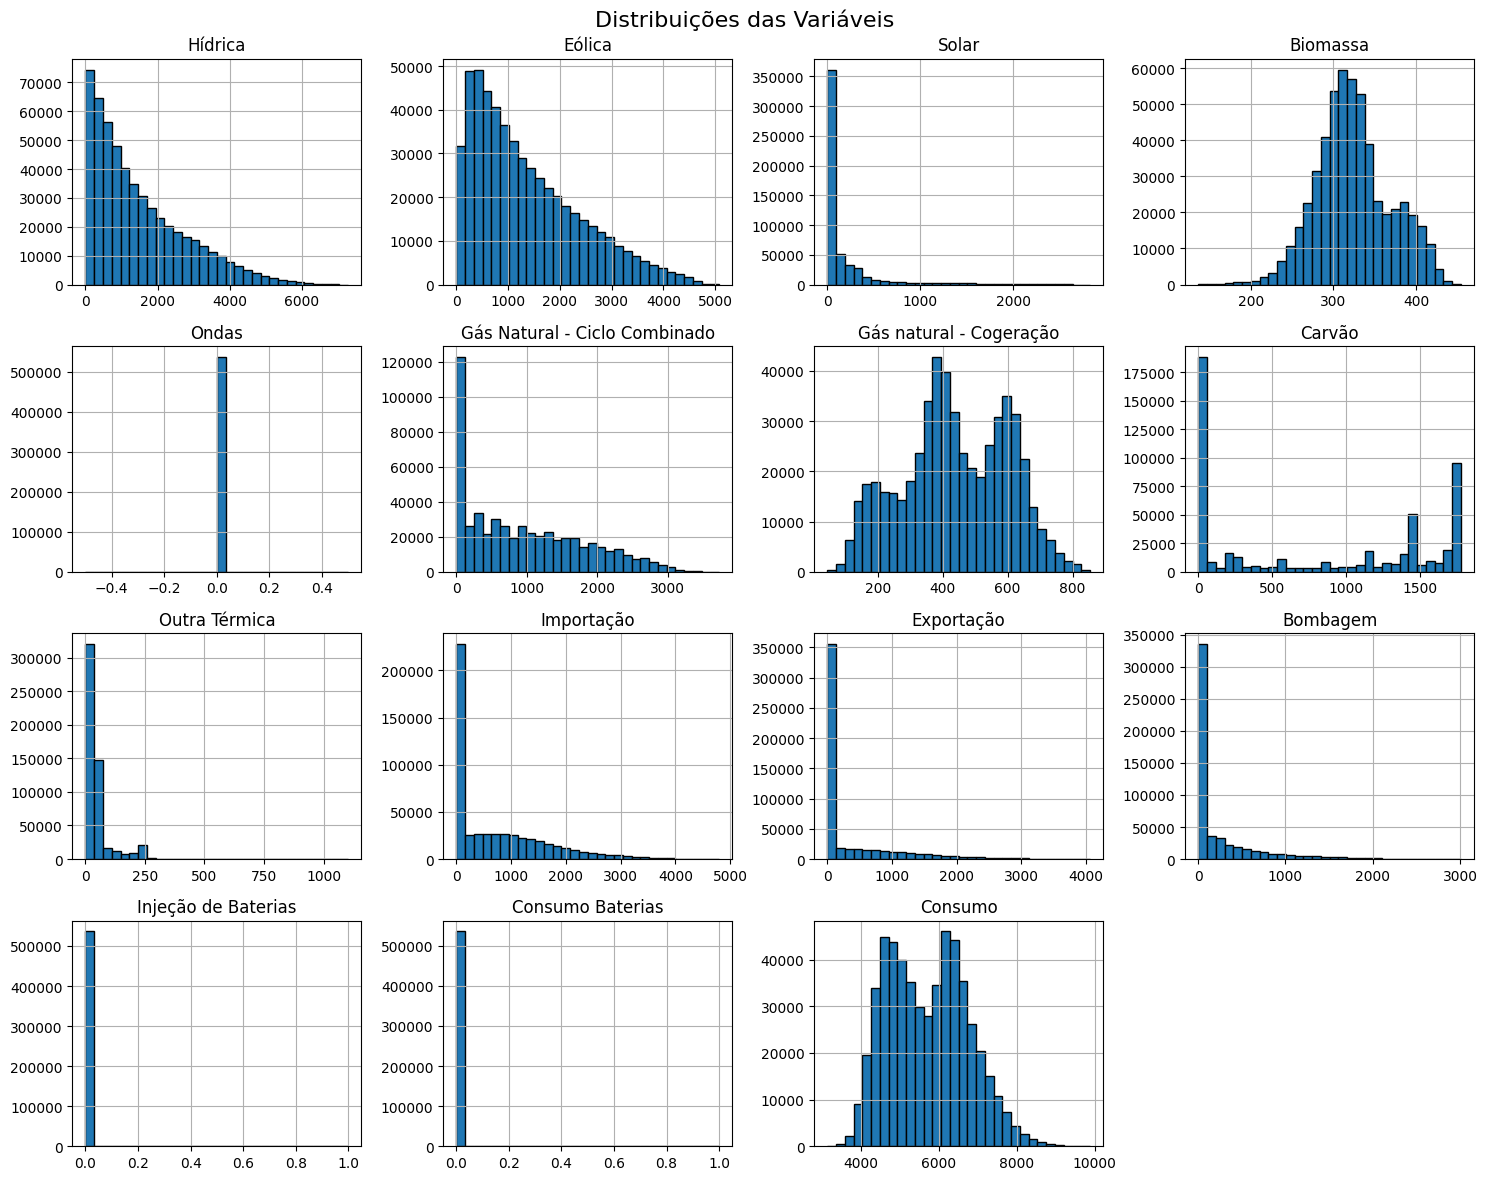

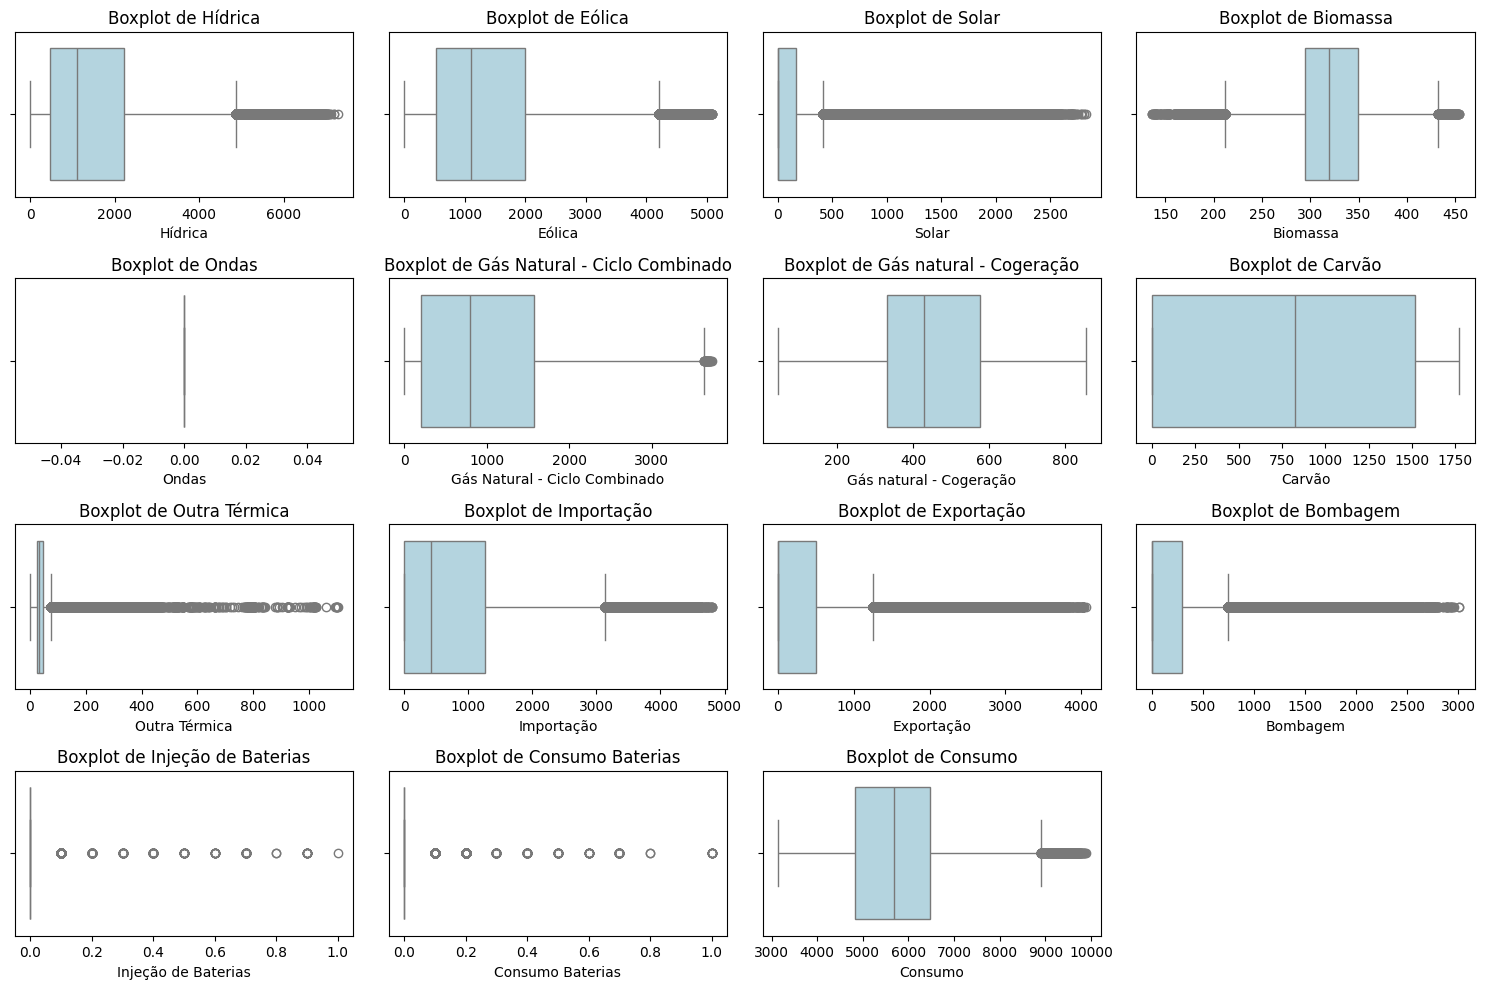

In [30]:
# Remover a coluna "Data e Hora" temporariamente para os gráficos
df_numerical = df.drop(columns=["Data e Hora"])

# Calcular o número de linhas e colunas necessárias para o layout
num_vars = len(df_numerical.columns)
num_cols = 4  # Número fixo de colunas
num_rows = int(np.ceil(num_vars / num_cols))  # Número de linhas necessário

# Plotar histogramas para todas as variáveis numéricas
df_numerical.hist(bins=30, figsize=(15, 3*num_rows), layout=(num_rows, num_cols), edgecolor='black')

# Ajustar título e layout
plt.suptitle("Distribuições das Variáveis", fontsize=16)
plt.tight_layout()
plt.show()

# Plotar boxplots para todas as variáveis numéricas (para verificar outliers)
plt.figure(figsize=(15, 10))
for i, column in enumerate(df_numerical.columns):
    plt.subplot(num_rows, num_cols, i+1)
    sns.boxplot(data=df_numerical, x=column, color='lightblue')
    plt.title(f"Boxplot de {column}")

plt.tight_layout()
plt.show()

### Distribuições Temporais

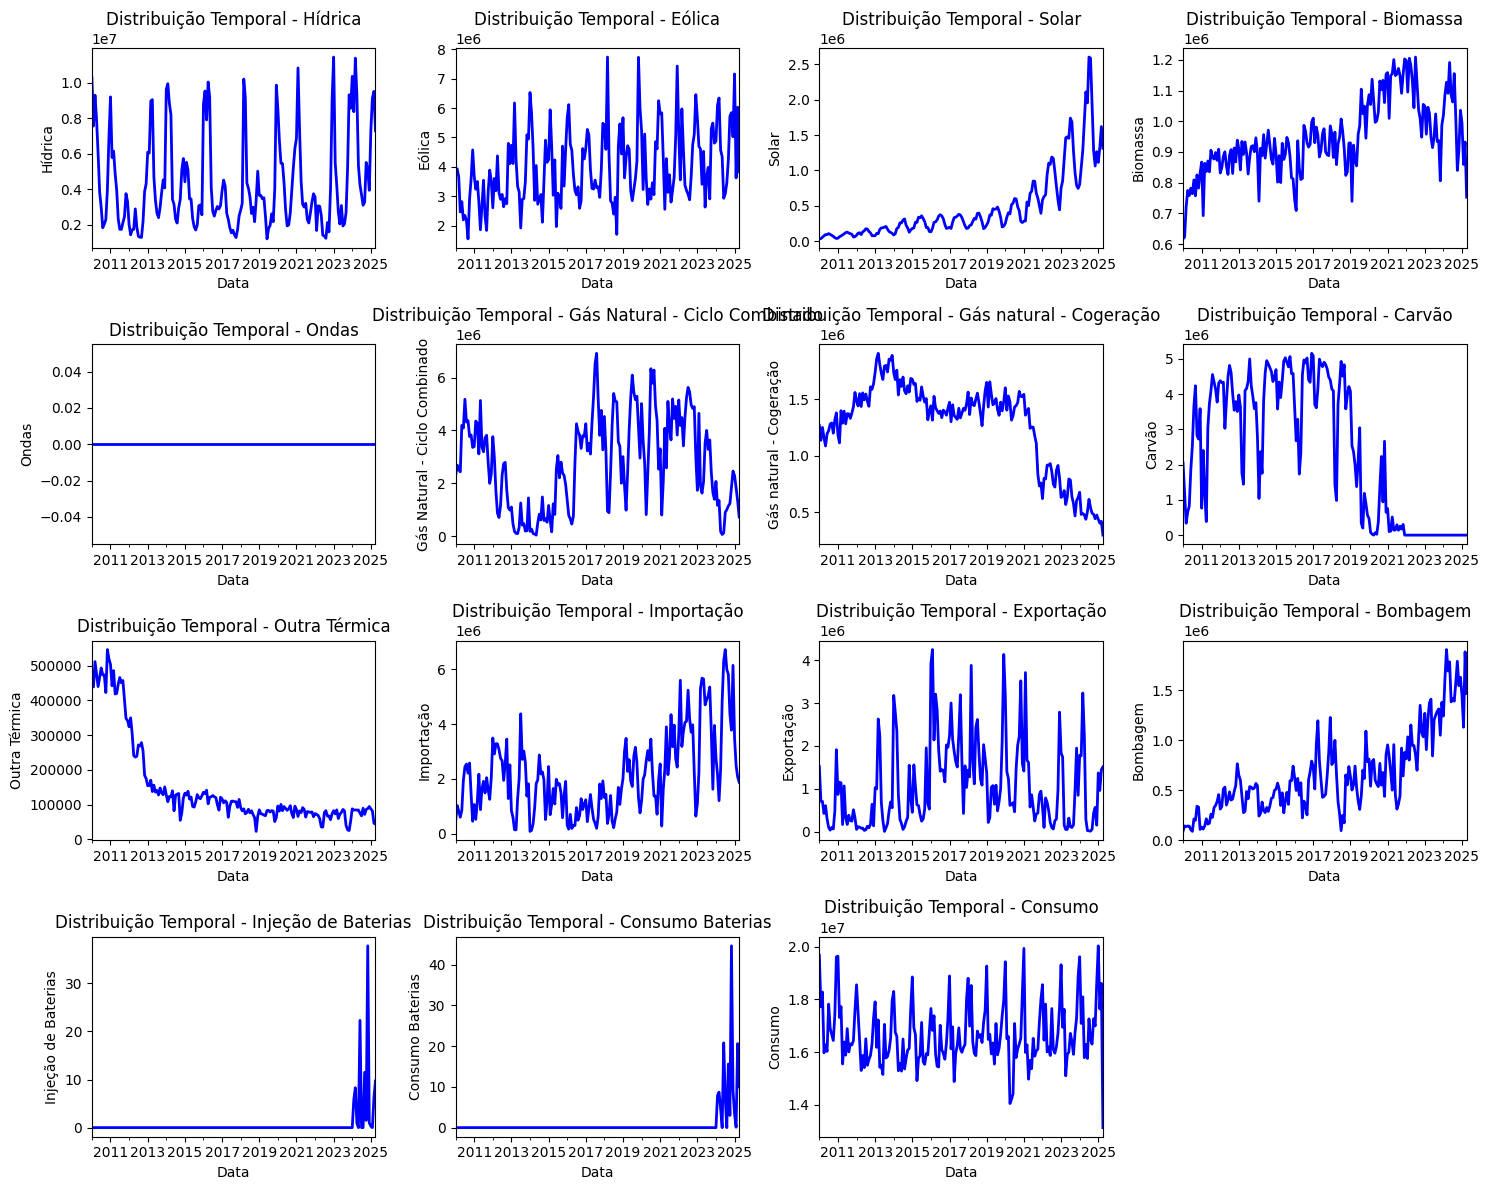

In [36]:
# Converter a coluna "Data e Hora" para o formato datetime
df['Data e Hora'] = pd.to_datetime(df['Data e Hora'], format='%d/%m/%Y %H:%M')

# Remover a coluna "Data e Hora" temporariamente para os gráficos
df_numerical = df.drop(columns=["Data e Hora"])

# Agrupar por mês ou por dia (dependendo de como queremos visualizar as distribuições)
df_monthly = df.resample('ME', on='Data e Hora').sum()  # Agrupar por mês

# Calcular o número de linhas e colunas necessárias para o layout
num_vars = len(df_numerical.columns)
num_cols = 4  # Número fixo de colunas
num_rows = int(np.ceil(num_vars / num_cols))  # Número de linhas necessário

# Visualizar as distribuições temporais para cada variável (mensal)
plt.figure(figsize=(15, 3*num_rows))
for i, column in enumerate(df_numerical.columns):
    plt.subplot(num_rows, num_cols, i+1)
    df_monthly[column].plot(kind='line', color='blue', linewidth=2)
    plt.title(f"Distribuição Temporal - {column}")
    plt.xlabel("Data")
    plt.ylabel(f"{column}")

plt.tight_layout()
plt.show()

### Gráficos de Análise

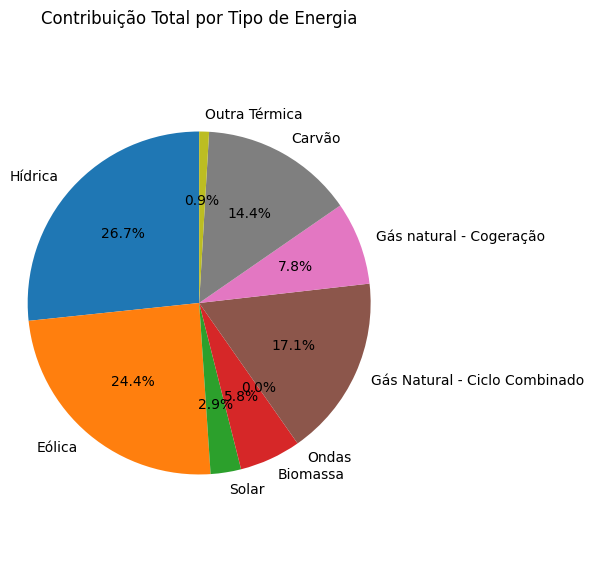

In [18]:
# Colunas das fontes de energia
energia_cols = [
    'Hídrica',
    'Eólica',
    'Solar',
    'Biomassa',
    'Ondas',
    'Gás Natural - Ciclo Combinado',
    'Gás natural - Cogeração',
    'Carvão',
    'Outra Térmica'
]

# Somar os valores de cada fonte
total_por_fonte = df[energia_cols].sum()

# Criar o gráfico circular
plt.figure(figsize=(6, 6))
plt.pie(total_por_fonte, labels=total_por_fonte.index, autopct='%1.1f%%', startangle=90)
plt.title("Contribuição Total por Tipo de Energia")
plt.axis('equal')  # garante que o pie chart seja redondo
plt.tight_layout()
plt.show()

### Matriz de Confusão

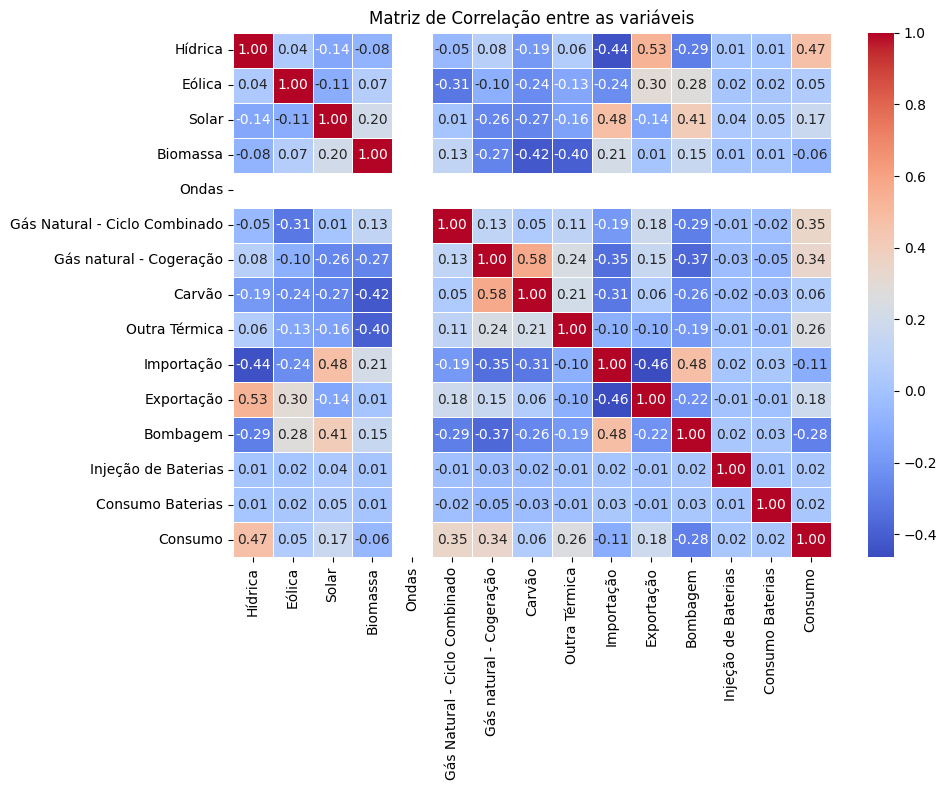

In [24]:
# Gerar a matriz de correlação sem a coluna "Data e Hora"
df_corr = df.drop(columns=["Data e Hora"])  # Remover temporariamente para a correlação
corr_matrix = df_corr.corr()

# Visualizar a matriz de correlação usando seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matriz de Correlação entre as variáveis")
plt.tight_layout()
plt.show()